In [670]:
import numpy as np
import matplotlib.pyplot as plt
import time

wirkingDir = './'

In [671]:
def matrixFromFile(fileName):
    with open(workingDir + fileName,'r') as file:
        content = file.readlines()
    
    params = content[0].split()
    rows = int(params[0])
    cols = int(params[1])
    n = int(params[2])

    A = np.zeros((rows,cols))

    content.pop(0)
    for elemento in content:
        params = elemento.split()
        i = int(params[0])
        j = int(params[1])
        val = float(params[2])

        A[i,j] = val

    return A

def vectorFromFile(fileName):
    with open(wirkingDir + fileName,'r') as file:
        content = file.readlines()
    n = int(content[0])
    f = []
    for i in range(n):
        f.append(float(content[i+1]))
    return np.array(f)


def formatSol(n,u):
    out = []
    temp = []

    for i in range(n):
        for j in range(n):
            temp.append(u[i*n+j])
        out.append(temp)
        temp = []

    return np.matrix(out)

In [672]:
finestGridN = 25
levels = 5
alpha = 1.
width = 10.
testCase = 3 #1,2 or 3

In [673]:
N = finestGridN
for i in range(1,levels):
    N = N * 2 - 1
print(N)

385


In [674]:
!./../Multigrid -n {N} -a {alpha} -w {width} -ml {levels} -test {testCase}
#N = finestGridN

Inserted N = 385
Inserted alpha = 1
Inserted width = 10
Inserted level = 5
Inserted test number = 3
Openmp enabled
Initialization time: 0.0168806 seconds


Achieved residual on coarse grid: 0.0992899
Achieved residual on coarse grid: 0.0992301
Achieved residual on coarse grid: 0.0997467
Achieved residual on coarse grid: 0.0998006
Achieved residual on coarse grid: 0.0999523
Achieved residual on coarse grid: 0.0999868
Achieved residual on coarse grid: 0.0999927
Achieved residual on coarse grid: 0.0999938
Achieved residual on coarse grid: 0.0999942
Achieved residual on coarse grid: 0.099994
Achieved residual on coarse grid: 0.0999689
Achieved residual on coarse grid: 0.099368
Achieved residual on coarse grid: 0.0996761
Achieved residual on coarse grid: 0.0996085
Achieved residual on coarse grid: 0.0986664
Achieved residual on coarse grid: 0.0976718
Achieved residual on coarse grid: 0.0998295
Achieved residual on coarse grid: 0.094921
Achieved residual on coarse grid: 0.0973897
Achieved residual on coarse grid: 0.0994253
Solving elapsed time: 4.91148 seconds


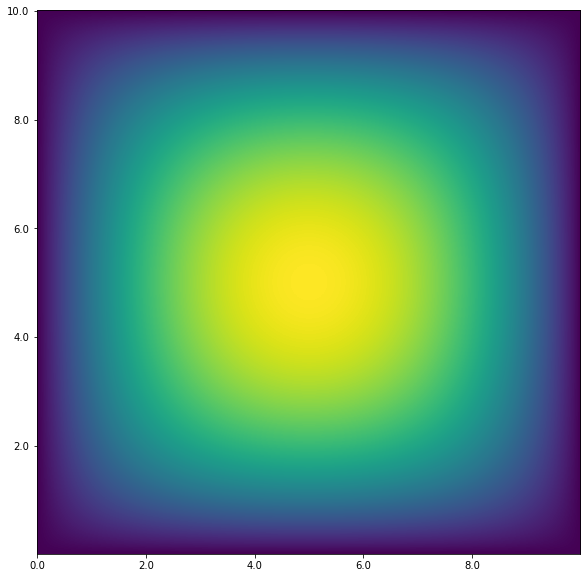

In [675]:
plt.rcParams['figure.figsize'] = [10,10]
colorMap = 'viridis'
u = vectorFromFile('x.mtx')
sol = formatSol(N,u)
plt.imshow(sol,cmap=colorMap)
plt.yticks(np.arange(0,N,N/5),np.around(width - np.arange(0,N,N/5)*width/N, decimals=2))
plt.xticks(np.arange(0,N,N/5),np.around(np.arange(0,N,N/5)*width/N, decimals=2))
plt.show()

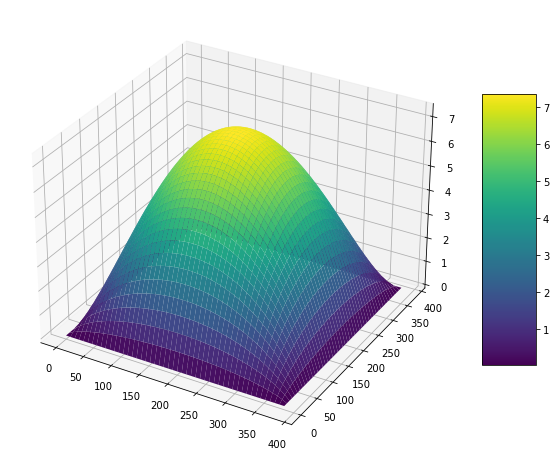

In [676]:
X = np.arange(0,N)
Y = np.arange(0,N)

X,Y = np.meshgrid(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X,Y,sol,cmap = colorMap)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


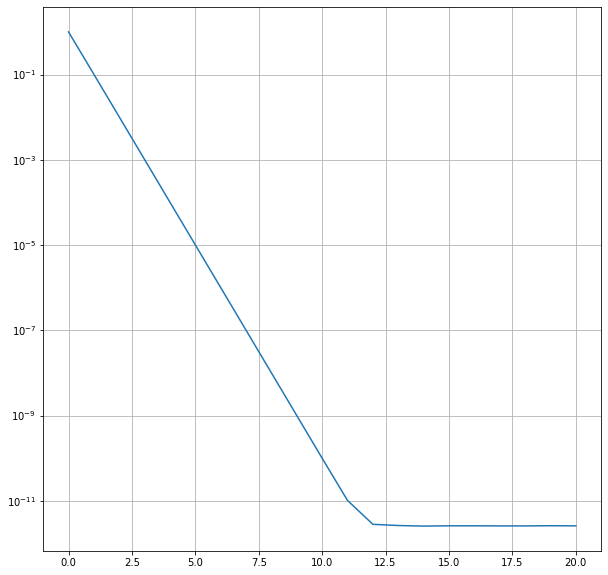

In [677]:

solvers = ['MGGS4.txt']
for solver in solvers:
    error = vectorFromFile(solver)
    x = np.arange(0,len(error))
    plt.semilogy(x,error)
plt.grid()
plt.show()